Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.5749
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.0186
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0523
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.0080
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0106
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.0060
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0058
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.0041
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0040
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.0039
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.0036
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.0035
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.0035
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.0043
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.0035
Epoch 16/20
9/9 ━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2994  
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0311
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139 
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0071
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

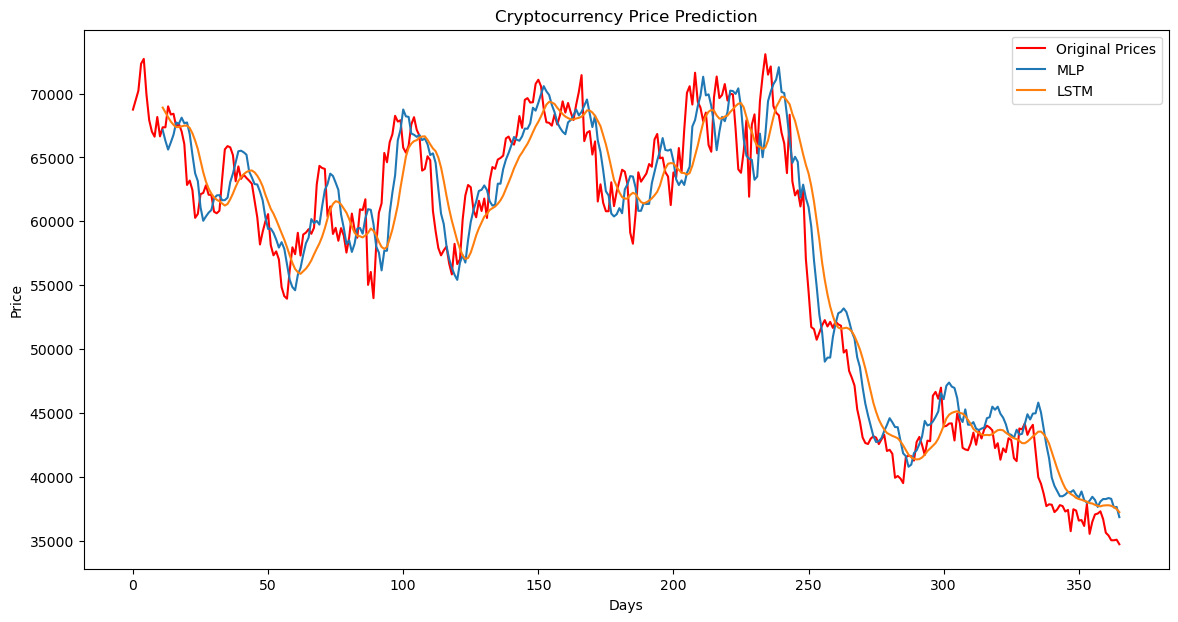

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
def load_data(filename):
    data = pd.read_csv(filename)
    prices = data['Open'].astype(str)
    prices = prices.str.replace(',', '')  # Remove commas
    prices = prices.astype(float).values.reshape(-1, 1)  # Convert to float
    
    # Normalize the prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(prices)
    
    return prices, scaled_prices, scaler

# Prepare the dataset for LSTM and MLP
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Build MLP model
def build_mlp(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build LSTM model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Generate predictions over the full dataset
def generate_full_predictions(model, X, time_step, method="MLP"):
    predictions = []
    for i in range(len(X)):
        if method == "LSTM":
            pred_input = X[i].reshape(1, time_step, 1)  # LSTM requires 3D input
        else:
            pred_input = X[i].reshape(1, -1)  # MLP requires 2D input
        predictions.append(model.predict(pred_input, verbose=0))
    return np.array(predictions)

# Plot the results
def plot_predictions(original_prices, predictions_dict, title="Cryptocurrency Price Prediction"):
    plt.figure(figsize=(14, 7))
    plt.plot(original_prices, label='Original Prices', color='red')

    for label, prediction in predictions_dict.items():
        plt.plot(range(len(original_prices) - len(prediction), len(original_prices)), prediction, label=label)
    
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Load your cryptocurrency price data
    filename = 'bitcoin.csv'  # Ensure this file has at least 365 rows of data
    prices, scaled_prices, scaler = load_data(filename)

    # Create dataset
    time_step = 10  # Number of days to consider for predictions
    X, y = create_dataset(scaled_prices, time_step)

    # Reshape input to be [samples, time steps, features] for LSTM
    X_lstm = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]

    # Train MLP model
    mlp_model = build_mlp(X_train.shape[1])
    mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # Train LSTM model
    lstm_model = build_lstm(X_train_lstm.shape[1])
    lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

    # Generate full predictions
    mlp_full_predictions = generate_full_predictions(mlp_model, X, time_step, method="MLP")
    lstm_full_predictions = generate_full_predictions(lstm_model, X_lstm, time_step, method="LSTM")

    # Inverse transform predictions
    mlp_full_predictions = scaler.inverse_transform(mlp_full_predictions.reshape(-1, 1))
    lstm_full_predictions = scaler.inverse_transform(lstm_full_predictions.reshape(-1, 1))
    y_actual = scaler.inverse_transform(y.reshape(-1, 1))

    # Align predictions
    predictions_dict = {
        'MLP': mlp_full_predictions.flatten(),
        'LSTM': lstm_full_predictions.flatten()
    }

    # Plot the results with all predictions
    plot_predictions(prices, predictions_dict)

if __name__ == "__main__":
    main()


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.7219
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.2047
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.0305
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.0097
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0146
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.0085
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0078
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.0067
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.0073
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.0056
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.0052
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0046
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0039
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.0043
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.0044
Epoch 16/20
9/9 ━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2578  
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0339
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0212
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

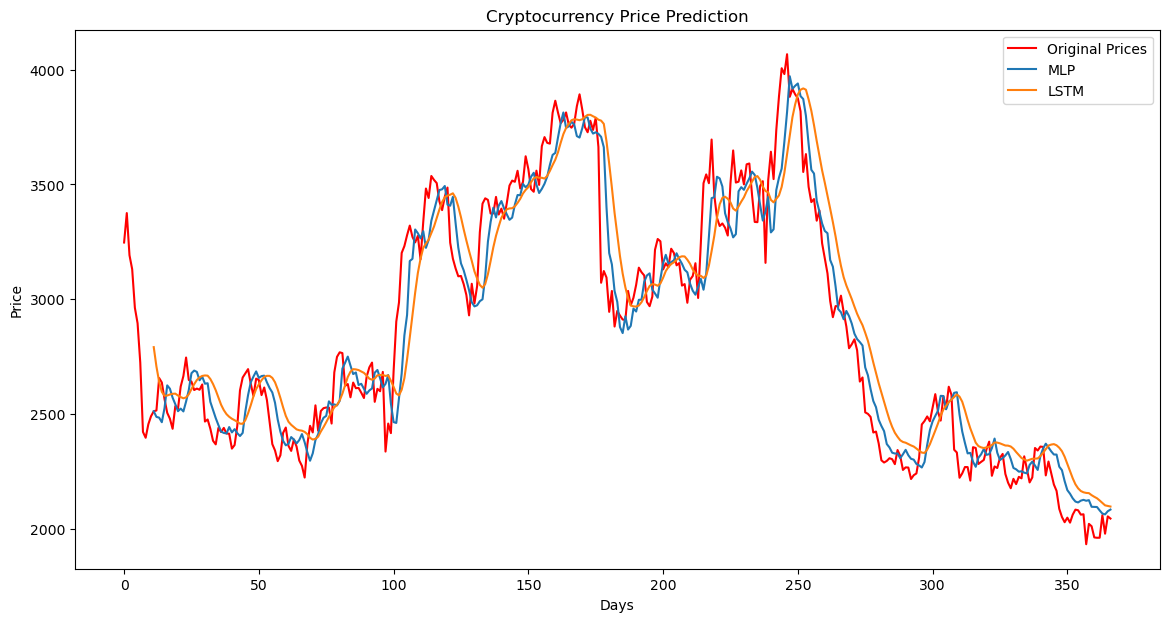

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
def load_data(filename):
    data = pd.read_csv(filename)
    prices = data['Open'].astype(str)
    prices = prices.str.replace(',', '')  # Remove commas
    prices = prices.astype(float).values.reshape(-1, 1)  # Convert to float
    
    # Normalize the prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(prices)
    
    return prices, scaled_prices, scaler

# Prepare the dataset for LSTM and MLP
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Build MLP model
def build_mlp(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build LSTM model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(input_shape, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Generate predictions over the full dataset
def generate_full_predictions(model, X, time_step, method="MLP"):
    predictions = []
    for i in range(len(X)):
        if method == "LSTM":
            pred_input = X[i].reshape(1, time_step, 1)  # LSTM requires 3D input
        else:
            pred_input = X[i].reshape(1, -1)  # MLP requires 2D input
        predictions.append(model.predict(pred_input, verbose=0))
    return np.array(predictions)

# Plot the results
def plot_predictions(original_prices, predictions_dict, title="Cryptocurrency Price Prediction"):
    plt.figure(figsize=(14, 7))
    plt.plot(original_prices, label='Original Prices', color='red')

    for label, prediction in predictions_dict.items():
        plt.plot(range(len(original_prices) - len(prediction), len(original_prices)), prediction, label=label)
    
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main function
def main():
    # Load your cryptocurrency price data
    filename = 'ethereumcsv.csv'  # Ensure this file has at least 365 rows of data
    prices, scaled_prices, scaler = load_data(filename)

    # Create dataset
    time_step = 10  # Number of days to consider for predictions
    X, y = create_dataset(scaled_prices, time_step)

    # Reshape input to be [samples, time steps, features] for LSTM
    X_lstm = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]

    # Train MLP model
    mlp_model = build_mlp(X_train.shape[1])
    mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # Train LSTM model
    lstm_model = build_lstm(X_train_lstm.shape[1])
    lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

    # Generate full predictions
    mlp_full_predictions = generate_full_predictions(mlp_model, X, time_step, method="MLP")
    lstm_full_predictions = generate_full_predictions(lstm_model, X_lstm, time_step, method="LSTM")

    # Inverse transform predictions
    mlp_full_predictions = scaler.inverse_transform(mlp_full_predictions.reshape(-1, 1))
    lstm_full_predictions = scaler.inverse_transform(lstm_full_predictions.reshape(-1, 1))
    y_actual = scaler.inverse_transform(y.reshape(-1, 1))

    # Align predictions
    predictions_dict = {
        'MLP': mlp_full_predictions.flatten(),
        'LSTM': lstm_full_predictions.flatten()
    }

    # Plot the results with all predictions
    plot_predictions(prices, predictions_dict)

if __name__ == "__main__":
    main()
